In [2]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

path_src = '../../tysserand2/'


Script loaded!


Script loaded!


<Axes: >

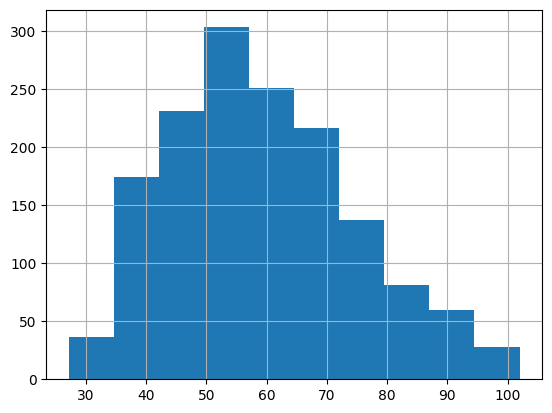

In [3]:
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/fcortex.coordinates.txt',sep=' ', index_col=0, header=None)
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.knn_edges(points, k = 1)
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()

# 

# Immune cell topography predicts response to PD-1 blockade in cutaneous T cell lymphoma


Script loaded!


,X,Y,Z,FileName
0,165,979,9,reg001
1,219,859,7,reg001
2,328,1105,7,reg001
3,422,120,7,reg001
4,415,870,8,reg001
...,...,...,...,...
117165,1594,222,9,reg066
117166,1639,635,8,reg066
117167,1637,657,9,reg066
117168,1658,761,8,reg066


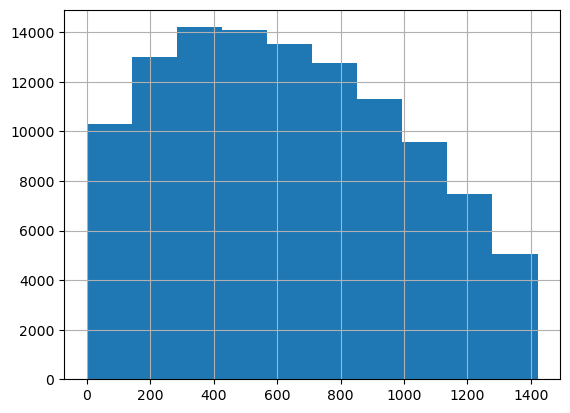

In [65]:
import importlib
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/41467_2021_26974_MOESM3_ESM_-_Objects-coords.csv', sep=';')
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.multi_sample_edges(coords, sample_col='FileName')
points = coords[['X','Y']]
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()
coords


# SlideSeq V2

Script loaded!


<Axes: >

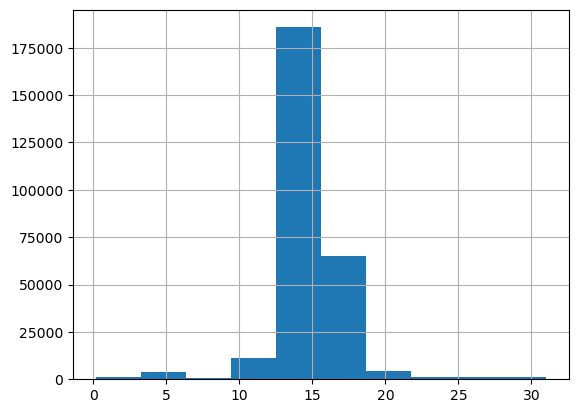

In [59]:
import glob
import pathlib
importlib.reload(SpAn)

SlideSeq_path = '../data/publicdatasets/SlideSeqV2/*csv'
distances = []
for file in glob.glob(SlideSeq_path) :
    coords = pd.read_csv(file ,sep=',', index_col=0)
    points = coords.iloc[:,[0,1]]
    knn_edges = SpAn.knn_edges(points, k = 1)
    distance = SpAn.get_distances(points, knn_edges)
    distance = SpAn.filter_top(distance,95) 
    distances += distance
pd.Series(distances).hist()



# IMMUcan

In [21]:
AllCells = pd.read_csv('../data/IMC_IMMUcan.csv',index_col=0)
cohorts = AllCells['cohort'].unique()
print(cohorts)

/tmp/ipykernel_2990557/1637362776.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  AllCells = pd.read_csv('../data/IMC_IMMUcan.csv',index_col=0)


['NSCLC2' 'NSCLC' 'BC2' 'SCCHN1' 'CRC1' 'CRC2' 'SCCHN2' 'BC3' 'RCC' 'BC1'
 'SCCHN3']


In [38]:
CellCohort['ROI']

0       False
1       False
2       False
3       False
4       False
        ...  
9635    False
9636    False
9637    False
9638    False
9639    False
Name: TLS, Length: 2098586, dtype: bool

In [43]:
CellCohort

,Pos_X,Pos_Y,sample_id,tumor_patches,ROI,TLS,cohort
0,30.622951,1.754098,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...,False,1.0,False,NSCLC2
1,176.315789,0.789474,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...,True,1.0,False,NSCLC2
2,211.000000,0.375000,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...,False,1.0,False,NSCLC2
3,304.736842,1.210526,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...,True,1.0,False,NSCLC2
4,373.600000,0.800000,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...,True,1.0,False,NSCLC2
...,...,...,...,...,...,...,...
9635,138.727273,497.727273,IMMUcan_Batch20210701_LUNG_10040819-LUNG-VAR-T...,False,4.0,False,NSCLC2
9636,20.500000,498.000000,IMMUcan_Batch20210701_LUNG_10040819-LUNG-VAR-T...,False,4.0,False,NSCLC2
9637,47.600000,497.800000,IMMUcan_Batch20210701_LUNG_10040819-LUNG-VAR-T...,False,4.0,False,NSCLC2
9638,257.538462,497.923077,IMMUcan_Batch20210701_LUNG_10040819-LUNG-VAR-T...,False,4.0,False,NSCLC2


In [53]:
1824876 + 1824876

3649752

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the histogram and KDE
sns.histplot(AllCells, x='value', hue='category', kde=True, multiple='stack', palette='tab10')

# Add title and labels
plt.title('Histograms and KDE Plots Colored by Category')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()


In [67]:
CellCohort

,Pos_X,Pos_Y,sample_id,tumor_patches,ROI,TLS,cohort
0,369.583333,1.333333,IMMUcan_Batch20201113_10033282-GU-VAR-TIS-01-I...,False,1.0,False,RCC
1,324.794118,0.970588,IMMUcan_Batch20201113_10033282-GU-VAR-TIS-01-I...,False,1.0,False,RCC
2,573.307692,0.692308,IMMUcan_Batch20201113_10033282-GU-VAR-TIS-01-I...,False,1.0,False,RCC
3,248.416667,1.277778,IMMUcan_Batch20201113_10033282-GU-VAR-TIS-01-I...,False,1.0,False,RCC
4,399.080000,1.320000,IMMUcan_Batch20201113_10033282-GU-VAR-TIS-01-I...,False,1.0,False,RCC
...,...,...,...,...,...,...,...
4823,257.125000,597.750000,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...,False,3.0,False,RCC
4824,295.777778,597.740741,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...,False,3.0,False,RCC
4825,356.120000,597.640000,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...,False,3.0,False,RCC
4826,168.000000,598.625000,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...,False,3.0,False,RCC


In [78]:
distances = []
all_distances = []
for cohort in cohorts:
    CellCohort = AllCells.loc[AllCells['cohort']==cohort,:].drop_duplicates()
    for tlsVal in [True, False]:
        if tlsVal:
            CellCohort_ROI = CellCohort.loc[CellCohort['ROI']==4,:]
        else:
            CellCohort_ROI = CellCohort.loc[CellCohort['ROI']!=4,:]
        for sample in CellCohort_ROI['sample_id'].unique():
            print(sample)
            Sample_Cell = CellCohort_ROI[CellCohort_ROI['sample_id']==sample]
            points = CellCohort_ROI[['Pos_X','Pos_Y']]
            knn_edges = SpAn.knn_edges(points, k = 1)
            distance = SpAn.get_distances(points, knn_edges)
            distance = SpAn.filter_top(distance,95) 
            distances += distance
            Distances = pd.DataFrame({'distance':distance, 'cohort': [cohort]*len(distance) , 'TLS': [tlsVal]*len(distance), 'sample': sample})
            all_distances.append(Distances)
        g = sns.histplot(pd.Series(distances)).set_title(cohort + ' ' + 'TLS:' + str(tlsVal))
        plt.show()
All_Distances = pd.concat(all_distances)

IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-TIS-01-IMC-01_004


In [71]:
All_Distances

,distance,cohort,TLS,sample
0,0.000000,NSCLC2,True,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
1,0.000000,NSCLC2,True,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2,0.000000,NSCLC2,True,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
3,0.000000,NSCLC2,True,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
4,0.000000,NSCLC2,True,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
...,...,...,...,...
566652,0.768324,NSCLC2,True,IMMUcan_Batch20210921_LUNG_10041535-LUNG-VAR-T...
566653,0.768335,NSCLC2,True,IMMUcan_Batch20210921_LUNG_10041535-LUNG-VAR-T...
566654,0.768336,NSCLC2,True,IMMUcan_Batch20210921_LUNG_10041535-LUNG-VAR-T...
566655,0.768336,NSCLC2,True,IMMUcan_Batch20210921_LUNG_10041535-LUNG-VAR-T...


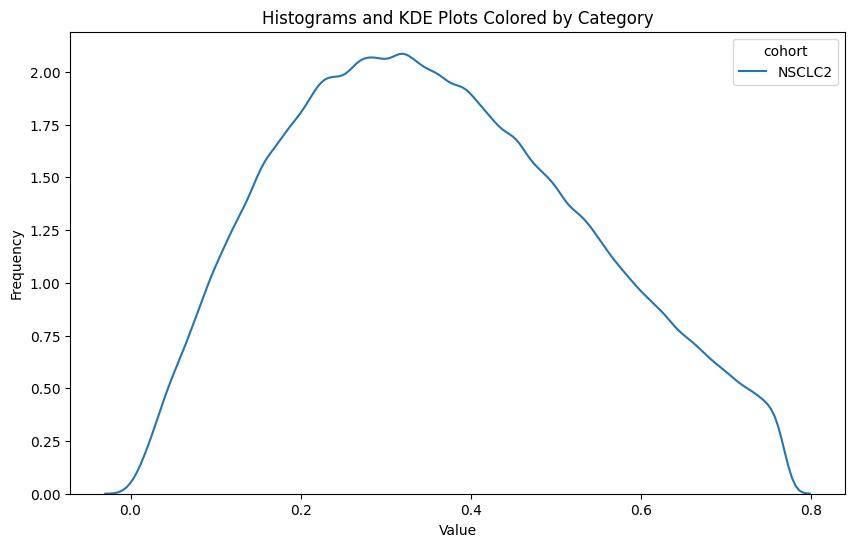

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the histogram and KDE
sns.kdeplot(data=All_Distances, x='distance', hue='cohort', palette='tab10')

# Add title and labels
plt.title('Histograms and KDE Plots Colored by Category')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()
